# import dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/netflix_titles.csv.zip')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1. How many Movies and TV Shows are there?

In [13]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


# 2. Top 5 countries with the most Netflix content

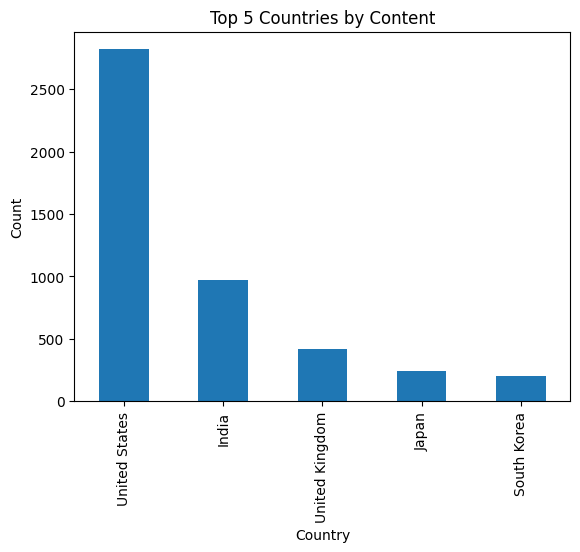

In [12]:
df['country'].value_counts().head(5).plot(kind='bar', title="Top 5 Countries by Content", ylabel="Count", xlabel="Country")
plt.show()


# 3. What are the most common content ratings (TV-MA, PG, etc.)?

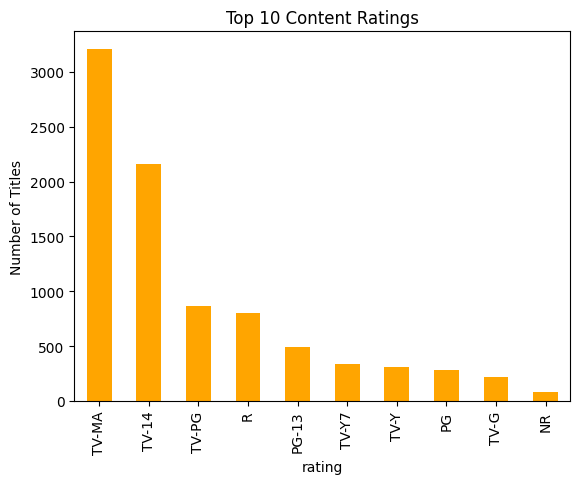

In [11]:
df['rating'].value_counts().head(10).plot(kind='bar', color='orange', title="Top 10 Content Ratings")
plt.ylabel('Number of Titles')
plt.show()

# 4. Top 10 genres across all Netflix content

In [10]:
genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [g for sublist in genres for g in sublist]
pd.Series(Counter(flat_genres)).sort_values(ascending=False).head(10).plot(kind='bar', color='green', title="Top 10 Genres")
plt.ylabel("Frequency")
plt.show()

NameError: name 'Counter' is not defined

# 5. What is the average duration of movies in minutes?

In [9]:
# Filter only Movies
movies = df[df['type'] == 'Movie']

# Extract minutes as integer
movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)

movies['duration_mins'].mean()


<ipython-input-9-2ead3310077f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)


np.float64(99.57718668407311)

# 6. Who are the top 5 most frequent directors?

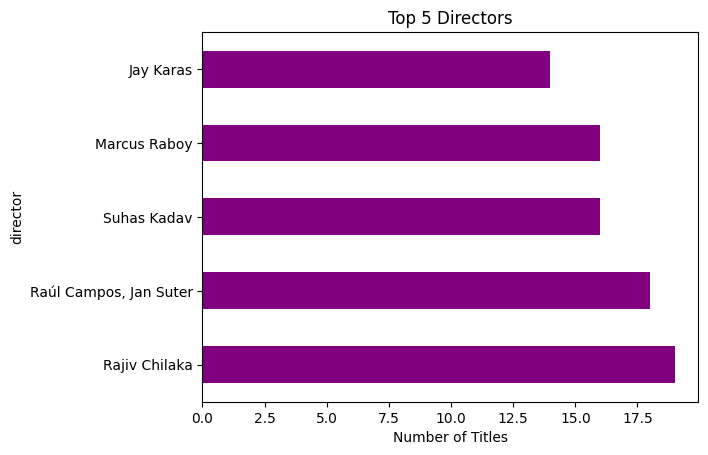

In [8]:
df['director'].dropna().value_counts().head(5).plot(kind='barh', title="Top 5 Directors", color='purple')
plt.xlabel("Number of Titles")
plt.show()